In [2]:
import pandas as pd

df = pd.read_csv("C:\\Users\\ABHINAV\\OneDrive\\Desktop\\Project\\flight_data.csv")

df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


df.info()
df.describe()
df.isnull().sum()


In [4]:
df['duration'] = df['duration'].astype(float)
df['class'] = df['class'].str.capitalize()


1. Average price per airline

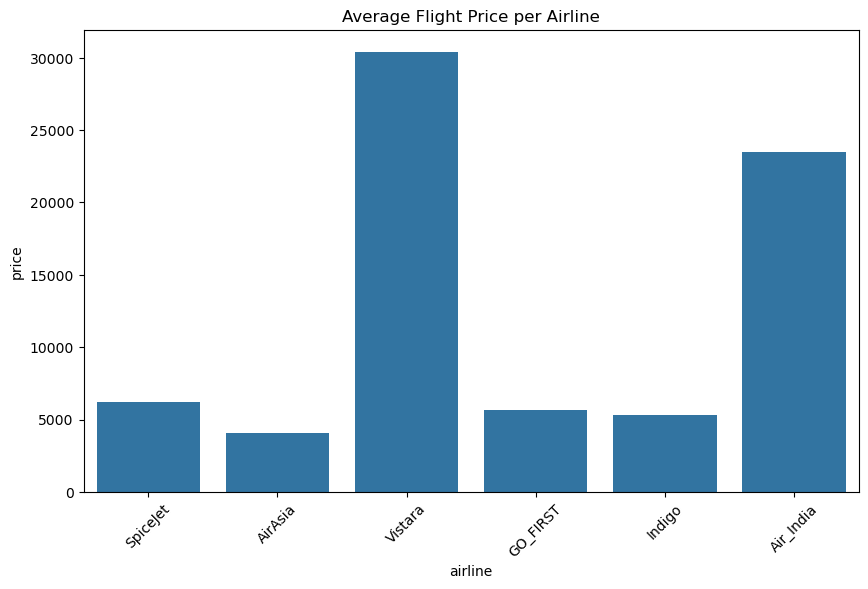

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='airline', y='price', data=df, estimator='mean', errorbar=None)
plt.title('Average Flight Price per Airline')
plt.xticks(rotation=45)
plt.show()


2. Price vs Days Left

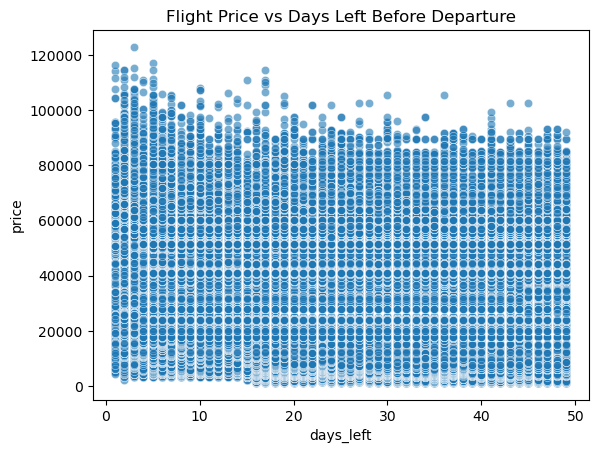

In [6]:
sns.scatterplot(x='days_left', y='price', data=df, alpha=0.6)
plt.title('Flight Price vs Days Left Before Departure')
plt.show()


3. Price by Source & Destination

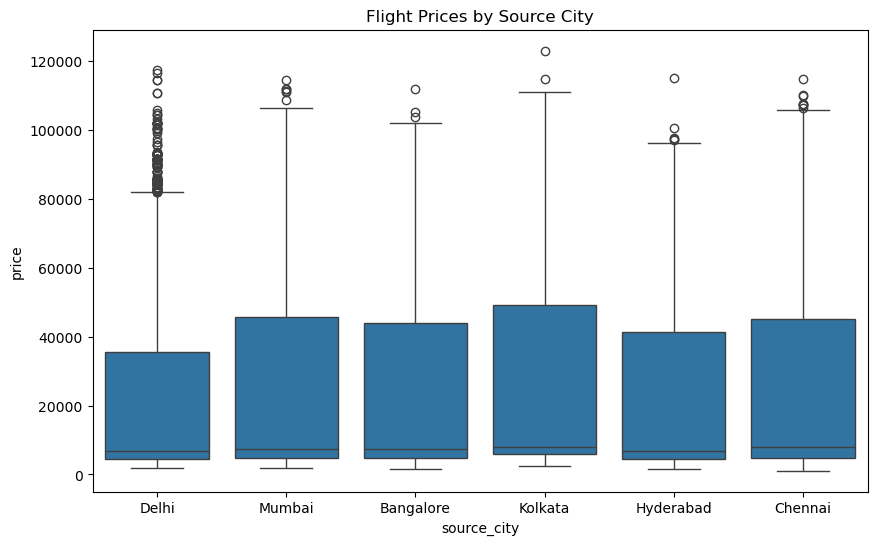

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(x='source_city', y='price', data=df)
plt.title('Flight Prices by Source City')
plt.show()


<Axes: >

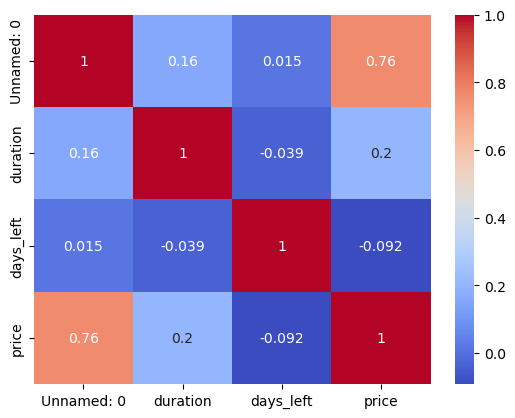

In [8]:
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['duration', 'days_left']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [10]:
from sklearn.metrics import r2_score, mean_absolute_error

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R²: 0.050421458079467185
MAE: 19129.170354444985
